In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
customer_example=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/week2_2/customer_example.csv')
customer_example

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

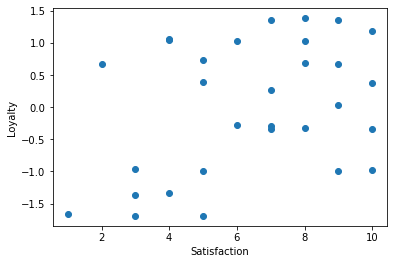

In [3]:
plt.scatter(customer_example.Satisfaction, customer_example.Loyalty)
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

# Clustering with Standardised Data 

In [11]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(customer_example)

# K=3

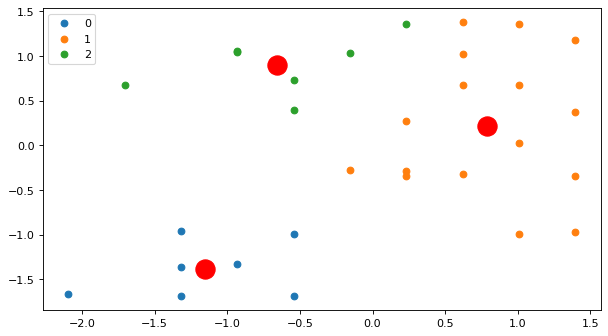

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustering_3 = kmeans.fit_predict(scaled_data)

figure(figsize=(9,5), dpi=80)
label = kmeans.fit_predict(scaled_data)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(scaled_data[label == i , 0] , scaled_data[label == i , 1] , label = i)
plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# K=4

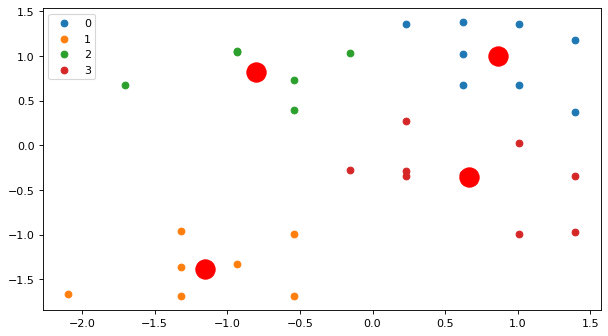

In [38]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustering_4 = kmeans.fit_predict(scaled_data)

from matplotlib.pyplot import figure
figure(figsize=(9,5), dpi=80)
label = kmeans.fit_predict(scaled_data)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(scaled_data[label == i , 0] , scaled_data[label == i , 1] , label = i)
plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Find optimal K using Elbow Method
## WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The goal is to minimise the sum.
## We can find the optimum value for K using an Elbow point graph. 

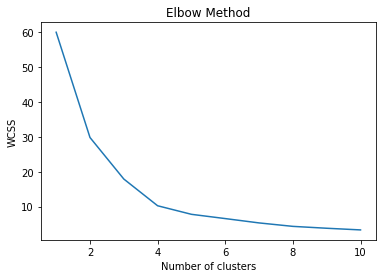

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## For the above-given graph, the optimum value for K would be 4. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. For example, from cluster 1 to 2 to 3 in the above graph we see a sudden and huge drop in WCSS. After 4 the drop is minimal and hence we chose 4 to be the optimal value for K.